# HW 1, P6 by Sagemath

In [1]:
set_random_seed(0)

## (a)

### (i)

In [2]:
x=var('x')
f=(1-x**2)**2

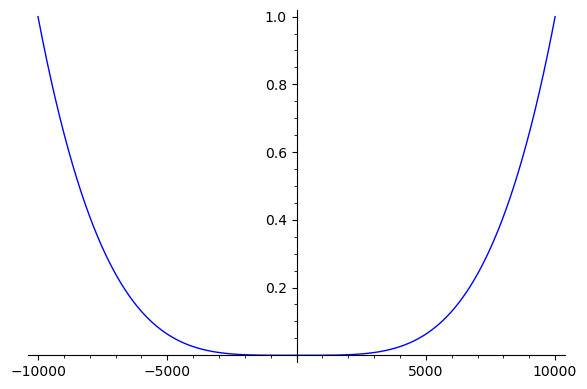

In [3]:
plot(f, x,-10000,10000)

### (ii)

In [4]:
A=matrix(2,2,[1,0.6,0.6,1])
var('x1','x2')

(x1, x2)

In [5]:
f1=lambda x1,x2: ((A-vector([x1,x2]).column()*vector([x1,x2]).row()).norm('frob'))**2

In [6]:
plot3d(f1, (x1,-1000,1000), (x2,-1000,1000), aspect_ratio=[1,1,1])

Graphics3d Object

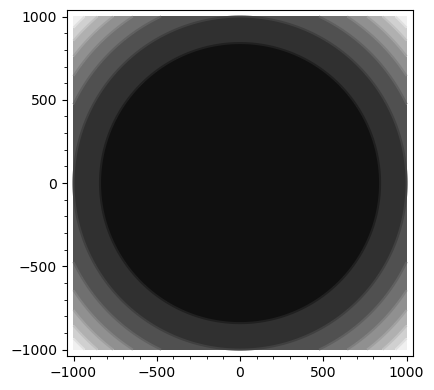

In [7]:
contour_plot(f1, (-1000,1000), (-1000,1000))

### (iii)

Pick a point $\hat{\theta}=0_{200\times 1}=[0,0,\dots 0]^T$

Pick two vectors $u=[1,0,0\dots 0]^T$ and $v=[0,1,0\dots 0]^T$

In [8]:
u=vector([0]*200)
u[0]=1
v=vector([0]*200)
v[1]=1

In [9]:
u.column()*v.row()

200 x 200 dense matrix over Integer Ring (use the '.str()' method to see the entries)

In [10]:
B=Matrix(RR, 200, lambda i,j: normalvariate(0, 1))
A=B*B.transpose()

$$(x_1u)(x_2v)^T=[t_{ij}]_{i,j},\ t_{ij}=x_1x_2\text{ if $i=1,j=2$, otherwise }t_{ij}=0$$

$$\|A-(x_1u)(x_2v)^T\|_F^2=\|A\|_F^2-a_{12}^2+(a_{12}-x_1x_2)^2=\|A\|_F^2+(x_1x_2)^2-2a_{12}x_1x_2$$

In [11]:
a=A[1,2]
Af=A.norm('frob')**2

In [12]:
f2=lambda x1,x2: Af+(x1*x2)**2-2*a*x1*x2

In [13]:
plot3d(f2, (x1,-1000,1000), (x2,-1000,1000), aspect_ratio=[1,1,1])

Graphics3d Object

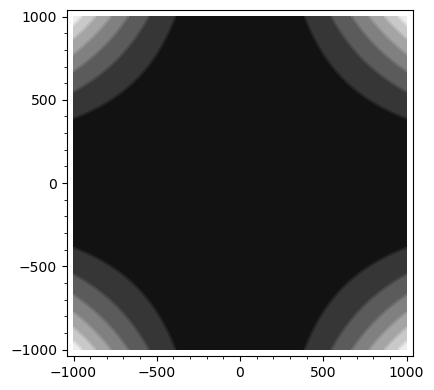

In [14]:
contour_plot(f2, (-1000,1000), (-1000,1000))

## (b)

$$(n, d, m) = (500, 30, 5)$$

In [15]:
z=var('z')
f1=exp(z)-1
f2=z
sigma=piecewise([[(-infinity,0),f1],[(0,infinity),f2]])

In [16]:
sigma(-1)

e^(-1) - 1

In [17]:
Train=Matrix(500,31, lambda i,j: normalvariate(0, 1))

In [18]:
x_train=Train[:,:-1]
y_train=Train[:,-1]

Projection onto a 2-dimensional space: $v=x_1[1,0,0,0,0]^T$, $W=x_2[[1,1,...,1]_{1\times 30},0_{1\times 30},0_{1\times 30},0_{1\times 30},0_{1\times 30}]^T$

$$\sum_{i=1}^{n}\left(y_{i}-v^{T} \sigma\left(W x_{i}\right)\right)^{2}=\sum_{i=1}^{n}\left(y_{i}-x_1x_2 sum(x_i)\right)^{2}$$

In [19]:
def f3(x1,x2):
    fv=0
    for i in range(500):
        fv+=(y_train[i][0]-x1*x2*sum(x_train[i]))**2
    return fv

In [20]:
plot3d(f3, (x1,-10,10), (x2,-10,10), aspect_ratio=[1,1,1])

Graphics3d Object

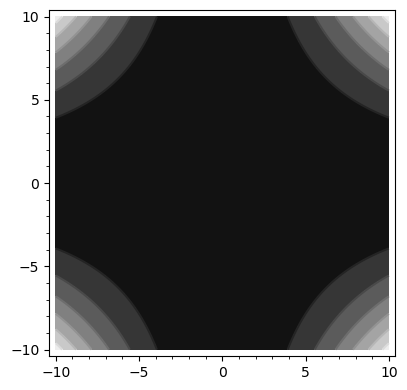

In [21]:
contour_plot(f3, (-10,10), (-10,10))